In [115]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [116]:
# import dataset
data = pd.read_excel("home supply and demand.xlsx")

In [117]:
# top 5 rows
data.head(5)

,DATE,Period,MORTGAGERATE,Un_rate,Homes_sold,Home_Starts,Popu_rate,HPI
0,2002-01-04,Q12002,7.14,5.6,1698,1636.0,0.0093,239.0
1,2002-06-14,Q22002,6.71,5.6,1717,1559.0,0.0093,259.0
2,2002-09-27,Q32002,5.99,5.7,1655,1507.0,0.0093,255.0
3,2002-12-27,Q42002,5.93,5.9,1788,1549.0,0.0093,220.0
4,2003-03-28,Q12003,5.91,5.9,1853,1590.0,0.0086,256.0


In [37]:
data.describe()

,MORTGAGERATE,Un_rate,Homes_sold,Home_Starts,Popu_rate,HPI
count,83.000000,83.000000,83.000000,82.000000,83.000000,82.000000
mean,4.767952,6.044578,1279.891566,1256.463415,0.007427,171.109756
std,1.157003,2.045832,472.073450,454.684077,0.002063,75.751055
min,2.650000,3.500000,490.000000,478.000000,0.001200,66.000000
25%,3.895000,4.650000,917.000000,927.250000,0.007000,106.250000
50%,4.550000,5.600000,1232.000000,1235.000000,0.007400,155.000000
75%,5.830000,7.200000,1659.500000,1591.500000,0.009300,226.750000
max,7.140000,14.700000,2273.000000,2151.000000,0.009700,351.000000


In [34]:
data.shape

(83, 8)

In [109]:
# Check null values
data.isnull().sum()

DATE            0
Period          0
MORTGAGERATE    0
Un_rate         0
Homes_sold      0
Home_Starts     1
Popu_rate       0
HPI             1
dtype: int64

In [110]:
#drop null values
data.dropna(inplace=True)

In [89]:
data.isnull().sum()

MORTGAGERATE    0
Un_rate         0
Homes_sold      0
Home_Starts     0
Popu_rate       0
HPI             0
dtype: int64

<AxesSubplot:>

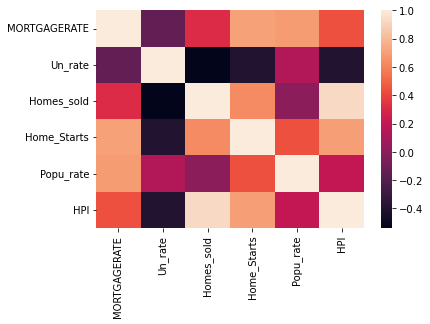

In [39]:
#Heatmap-used to show corelation
sns.heatmap(data.corr())

<AxesSubplot:title={'center':'HPI Vs time'}, xlabel='Period'>

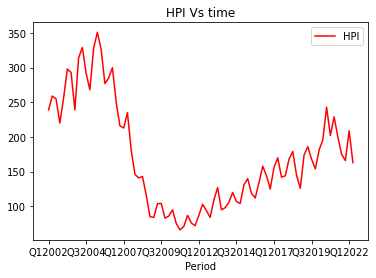

In [111]:
data.plot('Period','HPI',color="red",title="HPI Vs time")

Text(0.5, 1.0, 'HPI Vs population')

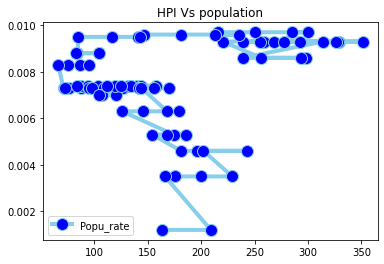

In [123]:
# plot line

plt.plot( 'HPI', 'Popu_rate', data=data, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.title("HPI Vs population")

# With rise of population, prices also increases.

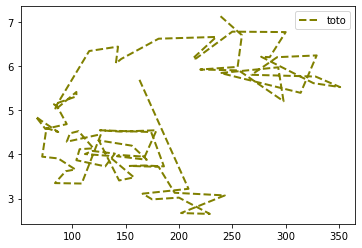

In [124]:
# plot line
plt.plot( 'HPI', 'MORTGAGERATE', data=data, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()

# Not direct relation.

Text(0.5, 1.0, 'HPI vs unemployment rate')

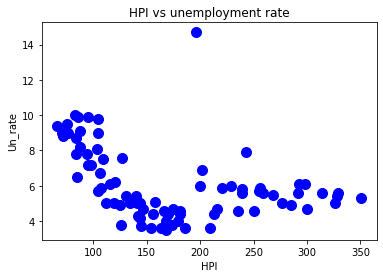

In [32]:
data.plot.scatter(x = 'HPI', y = 'Un_rate', s = 100, c='Blue')
plt.title("HPI vs unemployment rate")

# With lower unemployment rate,price will also low.

<AxesSubplot:title={'center':'no. of homes sold Vs time'}, xlabel='Period'>

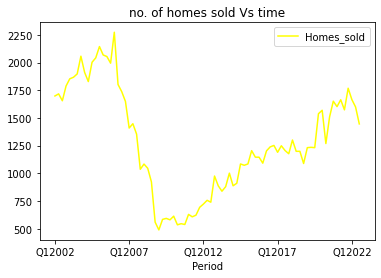

In [134]:
data.plot('Period','Homes_sold',color="yellow",title="no. of homes sold Vs time")

# With time, sale of homes decrease.

Text(0.5, 1.0, 'HPI vs no. of homes sold')

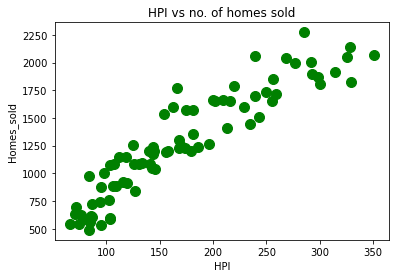

In [130]:
data.plot.scatter(x = 'HPI', y = 'Homes_sold', s = 100, c='green')
plt.title("HPI vs no. of homes sold")

# there is a positive relation between HPI and No. of homes sold.

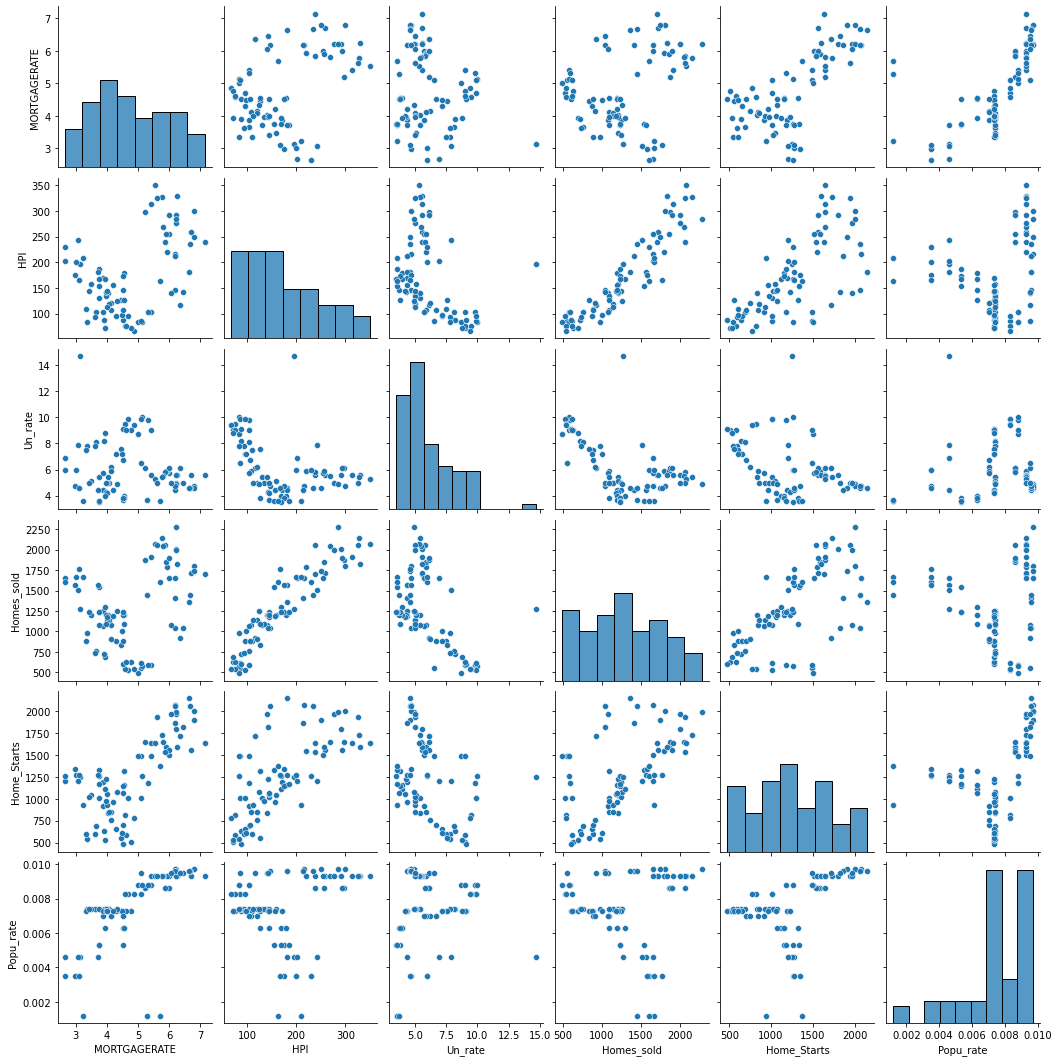

In [33]:
g=sns.pairplot(data)

# Date modelling

In [61]:
data.dtypes

DATE            datetime64[ns]
Period                  object
MORTGAGERATE           float64
Un_rate                float64
Homes_sold               int64
Home_Starts            float64
Popu_rate              float64
HPI                    float64
dtype: object

In [93]:
data.drop(['DATE','Period'], axis = 1,inplace=True)
data.shape

(82, 6)

# We use train data and test data , train data to train our machine and test data to see if it has learnt the data well or not

In [94]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(data,test_size=0.3,random_state=101)

In [95]:
df_train.shape

(57, 6)

In [96]:
df_test.shape

(25, 6)

In [97]:
y_train = df_train.pop("HPI")
X_train = df_train

In [98]:
y_test = df_test.pop("HPI")
X_test = df_test

In [99]:
y_test

26    116.0
48    106.0
33     95.0
16    285.0
22    181.0
74    243.0
21    235.0
45    127.0
25    143.0
56    134.0
30    104.0
46     95.0
2     255.0
13    351.0
68    174.0
6     293.0
80    209.0
32     86.0
14    326.0
54    119.0
67    126.0
20    213.0
52    131.0
27     85.0
55    112.0
Name: HPI, dtype: float64

In [100]:
X_test

,MORTGAGERATE,Un_rate,Homes_sold,Home_Starts,Popu_rate
26,6.35,6.1,923,1720.0,0.0095
48,4.53,6.7,888,695.0,0.0070
33,4.69,9.9,536,1013.0,0.0083
16,6.21,4.9,2273,1998.0,0.0097
22,6.63,4.6,1354,2151.0,0.0096
74,3.07,7.9,1510,1207.0,0.0046
21,6.67,4.6,1448,2061.0,0.0096
45,4.46,7.6,839,554.0,0.0073
25,6.45,5.0,1046,1821.0,0.0095
56,3.97,5.0,1092,970.0,0.0074


In [101]:
from sklearn.linear_model import LinearRegression
liner_reg=LinearRegression()

In [102]:
# fit() training
liner_reg.fit(X_train,y_train)

LinearRegression()

In [103]:
y_pred=liner_reg.predict(X_test)

In [104]:
y_pred

array([141.90823403, 101.49440095,  79.66033303, 331.62688194,
       206.60344388, 191.45256256, 217.41310792,  96.39312117,
       157.1477245 , 132.19052829,  93.9544282 , 102.89540381,
       235.36956096, 294.27892894, 139.69960083, 267.7925806 ,
       171.5854732 ,  90.14001916, 298.30182944, 136.73800647,
       129.51940196, 206.66345826, 133.75306326,  88.09775567,
       138.5570672 ])

In [105]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.8684670100393559


# R-squared measures the strength of the relationship between our model and the dependent variable on a convenient 0 – 100% scale. As we get higher R2, the better the regression model fits our observations and better is the model and the results.